### Importing different libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Import Movies file for the dat file wit a separator ::

In [5]:
usecols=['MovieID','Title','Genres']  
df2 = pd.read_csv('D:/MovieLensCasestudy/movies.dat',sep="::",names=usecols,engine='python')

In [6]:
#Balanced dataset since the rows contains equal data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [8]:
df2.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


### Made Dummie Variable for Genres categories

In [10]:
movie_genres1 = df2['Genres'].str.get_dummies('|')
movie_genres1

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [35]:
df2.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


### Find Null Values for Movies dat file

In [5]:
df2.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [6]:
#Balaced Dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
df2.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [11]:
#Users dat file
usercols = ['UserID','Gender','Age','Occupation','Zip Code']
dfUsers = pd.read_csv('D:/MovieLensCasestudy/users.dat',sep="::",names=usercols,engine='python')

In [12]:
dfUsers.head()

,UserID,Gender,Age,Occupation,Zip Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [21]:
dfUsers.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip Code      0
dtype: int64

In [13]:
dfUsers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip Code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [14]:
dfUsers.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


df1 = df1.replace('::', ' ')

In [13]:
#Ratings dat file
ratingscols=['UserID','MovieID','Rating','timestamp']
dfRatings = pd.read_csv('D:/MovieLensCasestudy/ratings.dat',sep="::",names=ratingscols,engine='python')

In [14]:
dfRatings.head()

,UserID,MovieID,Rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
dfRatings.isnull().sum()

UserID       0
MovieID      0
Rating       0
timestamp    0
dtype: int64

In [10]:
dfRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [11]:
dfRatings.describe()

,UserID,MovieID,Rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


### Apply date format for the Ratings file  for the timestamp column

In [15]:
import time
dfRatings['timestamp'] = dfRatings['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))

In [16]:
dfRatings.head()

,UserID,MovieID,Rating,timestamp
0,1,1193,5,2001
1,1,661,3,2001
2,1,914,3,2001
3,1,3408,4,2001
4,1,2355,5,2001


###  Data Visualization for the Users by Age

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

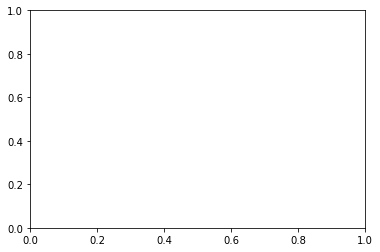

In [17]:
age_group = dfUsers.groupby('Age').size()
plt.hist(data = age_group,x=dfUsers.Age,bins=30)
#Conclusion: Most Of the Users are from 20 to 30 years group. Maximum is 25 yrs

### Finding the Rating Of Tostory Movie whose id=1

In [14]:
#ToyStory Data
toystory_data = dfRatings[dfRatings.MovieID==1]
toystory_data.head(10)

,UserID,MovieID,Rating,timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
1966,18,1,4,978154768
2276,19,1,5,978555994
2530,21,1,3,978139347
2870,23,1,4,978463614
3405,26,1,3,978130703


### Visualization using Histogram for Toystory data for user ratings

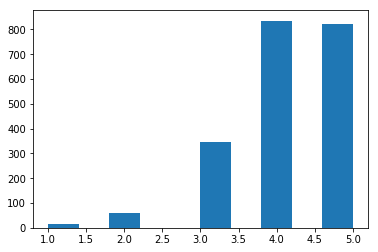

In [15]:
plt.hist(x=toystory_data['Rating'])
plt.show()
#Conclusion: Maximum Ratings the Toystory user has given 4 star. (800)

In [12]:
movieDataframe.head(10)

,MovieID,Title,Genres,UserID,Rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
5,1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768
6,1,Toy Story (1995),Animation|Children's|Comedy,19,5,978555994
7,1,Toy Story (1995),Animation|Children's|Comedy,21,3,978139347
8,1,Toy Story (1995),Animation|Children's|Comedy,23,4,978463614
9,1,Toy Story (1995),Animation|Children's|Comedy,26,3,978130703


### Top 25 movie ratings descending order

In [16]:
movie_rating = dfRatings.groupby(['MovieID'],as_index=False)
#Average Movie Ratings of Top 25 movies ratings
average_movieRatings = movie_rating.agg({'Rating':'mean'})
top_25_movies = average_movieRatings.sort_values('Rating',ascending=False).head(25)
top_25_movies

,MovieID,Rating
926,989,5.000000
3635,3881,5.000000
1652,1830,5.000000
3152,3382,5.000000
744,787,5.000000
3054,3280,5.000000
3367,3607,5.000000
3010,3233,5.000000
2955,3172,5.000000
3414,3656,5.000000


In [17]:
#Rating of userid = 2696
user_rating_data = dfUsers[dfUsers['UserID'] == 2696]
user_rating_data.head()

,UserID,Gender,Age,Occupation,Zip Code
2695,2696,M,25,7,24210


In [11]:
dfRatings.head(10)

,UserID,MovieID,Rating,timestamp
0,1,1193,5,2001
1,1,661,3,2001
2,1,914,3,2001
3,1,3408,4,2001
4,1,2355,5,2001
5,1,1197,3,2001
6,1,1287,5,2001
7,1,2804,5,2001
8,1,594,4,2001
9,1,919,4,2001


In [39]:
df2.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


### Apply Unique Genres to 1000 rows

In [19]:
#Apply to 1000 rows
data1k = df2[:1000]

In [21]:
#Print unique genres
unique_genres = list(set(x))
print(unique_genres)
print(len(unique_genres))

[]
0


In [22]:
#One hot Encoding for Each Genre Category
unique_genres = pd.Series(unique_genres)

In [23]:
dfUnique = pd.DataFrame()
for row in data1k.Genres:
    a=unique_genres.isin(row)
    dfUnique = dfUnique.append(a,ignore_index=True)
dfUnique[:5]

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [24]:
dfUnique.columns = unique_genres
dfUnique.head()

""


In [50]:
#Concat the data1k Table with this table containing One hot Encod.
data1k = pd.concat((data1k,dfUnique))
data1k.head()

C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,0,1,2,3,4,5,6,7,8,9,...,War,Thriller,Film-Noir,Musical,Documentary,Adventure,Comedy,Drama,Animation,Children's
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


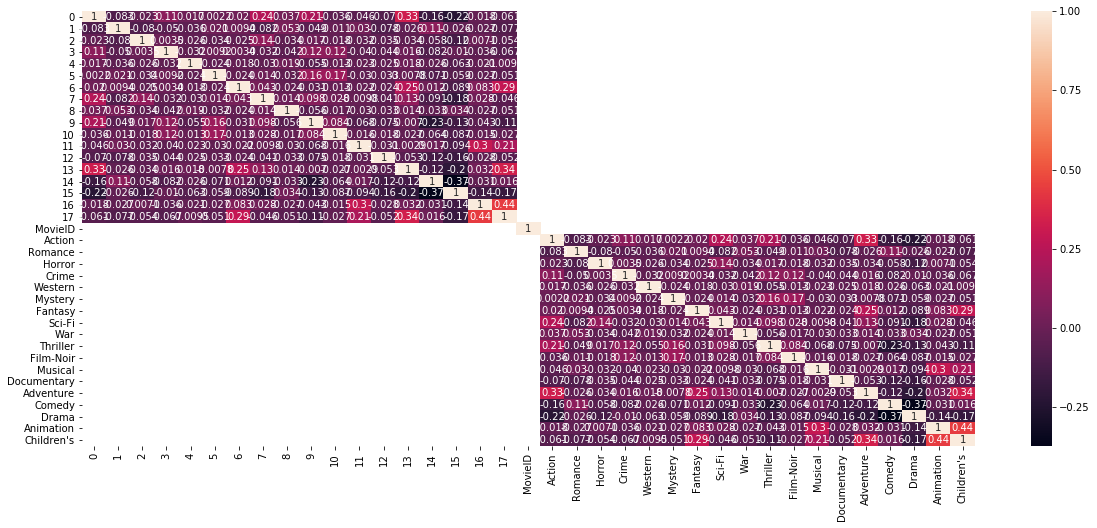

In [56]:
data = pd.concat((data1k,dfUnique))
display(data.head(10))

C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,War,Thriller,Film-Noir,Musical,Documentary,Adventure,Comedy,Drama,Animation,Children's
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


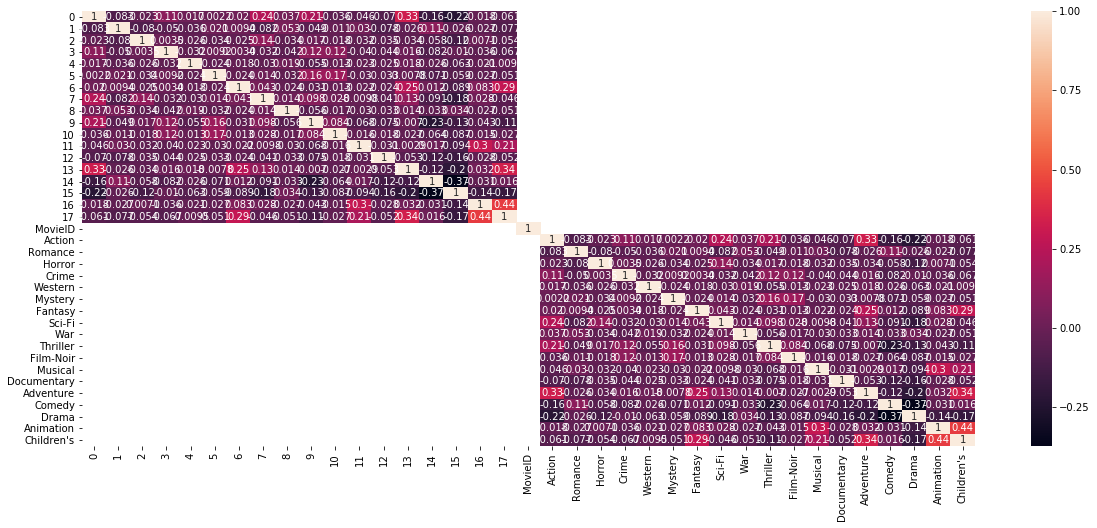

In [58]:
data1K = data[:1000]
#Used 1000 rows
data.head()#features affecting the ratings of any particular movie.
plt.figure(figsize=(20,8))
corr = data1k.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':10})

In [25]:
#Viewwership by age for Toystory
#Merge the Ratings & Users table
viewership = pd.merge(dfRatings,dfUsers,how="left",left_on=['UserID'],right_on=['UserID'])

In [26]:
few_viewership = viewership.head(5000)
few_viewership.shape

(5000, 8)

In [27]:
feature_cols = ['Age','Occupation']
X = few_viewership[feature_cols]  

In [28]:
     y=few_viewership['Rating']   

In [29]:
# Split-out validation dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [30]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3750, 2), (1250, 2), (3750,), (1250,))

In [31]:
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [32]:
result = logitReg.predict(x_test)

In [33]:
print(accuracy_score(y_test,result))
print(confusion_matrix(y_test,result))
print(classification_report(y_test,result))
#Accuracy is 34%

0.348
[[  0   0   1  46   0]
 [  0   0   3 125   0]
 [  0   0   8 340   0]
 [  0   0  10 427   0]
 [  0   0   9 281   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00       128
           3       0.26      0.02      0.04       348
           4       0.35      0.98      0.52       437
           5       0.00      0.00      0.00       290

   micro avg       0.35      0.35      0.35      1250
   macro avg       0.12      0.20      0.11      1250
weighted avg       0.19      0.35      0.19      1250



C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
#SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='linear',C=1).fit(x_train,y_train)
svm_predictions = svm_model.predict(x_test)

accuracy = svm_model.score(x_test,y_test)

cm = confusion_matrix(y_test,svm_predictions)
accuracy

0.3496

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knneighbors = KNeighborsClassifier(n_neighbors=10).fit(x_train,y_train)
accuracy = knneighbors.score(x_test,y_test)
knn_predictions = knneighbors.predict(x_test)
cm = confusion_matrix(y_test,knn_predictions)
accuracy

0.3528

In [42]:
#Naive Bayes classifier 

from sklearn.naive_bayes import GaussianNB 
GN = GaussianNB().fit(x_train, y_train) 
GN_predictions = GN.predict(x_test) 
  
# accuracy on X_test 
accuracy = GN.score(x_test, y_test)  
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, GN_predictions) 

accuracy

0.348

In [ ]:
# SVM has the highest accuracy score compared to other algos 